## Import dependencies

First, we need to import the agent and the environment.

Along with the agent and the environment, we also need to import torch and matplotlib. `%matplotlib inline` allows us to show the plots in Jupyter.

In [2]:
import torch
from IPython.display import clear_output
from collections import deque
from src.agent import Agent, DQN_algo, DoubleDQN_algo
from src.replay_buffer import ReplayBuffer, PriorityReplayBuffer
from src import environment as env
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("error")

%matplotlib inline

## Train function

We define a helper function to make it easy to run multiple training episodes.

In [3]:
def train(env_train, agent, episodes, label=None, solve=True):
    scores = deque([0] * 100, maxlen=100)
    steps = []
    avg_scores = []
    for i in range(1, episodes + 1):
        score = env.episode(env_train, agent, train_mode=True)

        scores.append(score)

        avg = sum(scores)/len(scores)
        torch.save(agent.dqn_local.state_dict(), 'model.pth')

        steps.append(i)
        avg_scores.append(avg)

        clear_output(wait=True)
        print("{}episodes: {}/{}, average score: {}".format("{} - ".format(label if label != None else ""), i, episodes, avg))

        if avg >= 13 and solve:
            break
    
    return steps, avg_scores

## Start the environment

The next block will initialize a default environment. The default environment is optimized for training.

In [4]:
env_train = env.Environment()

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


## Create agent and train

In the next 4 blocks, we will create 4 agents, 1 each for the following algorithm:
1. DQN with experience replay
2. DQN with prioritised experience replay
3. Double DQN with experience replay
4. Double DQN with prioritised experience replay

When creating the agent, we can specify the following hyperparameters:
- `gamma`. This is the discount factor
- `lr`. Learning rate
- `ep_decay`, `ep_start`, `ep_min`. Epsillon related parameters
    - *Formula for decay is `max(ep_start * (ep_decay ** t_step), ep_min)`*
- `learn_every`. Number of experience steps to take before taking a learn step

The replay buffer is injected into the agent. The default replay buffer is uniformly sampled and has the following hyperparameters:
- `max_length`
- `batch_size`

For the prioritised replay buffer, we also have the option to pass in the following hyperparameters:
- `alpha`. Prioritisation alpha
- `ep`. Small constant added to `td error` to avoid 0.0 values
- `beta`. Controls how much bias is tempered. Value closer to 0 will temper bias more
- `beta_increment`. Increment beta over time to 1. This will introduce more bias over time

 - episodes: 1831/2000, average score: 13.1


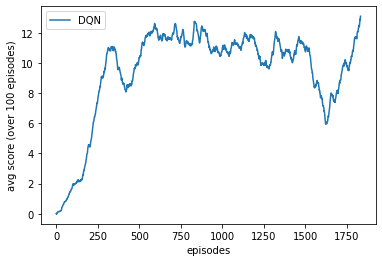

In [5]:
agent = Agent(env_train.state_size, env_train.action_size, gamma=1, seed=0, lr=0.001, 
              targets_algo=DQN_algo)

steps, score = train(env_train, agent, 2000)
plt.plot(steps, score, label="DQN")

plt.legend()
plt.xlabel("episodes")
plt.ylabel("avg score (over 100 episodes)")
plt.show()

 - episodes: 797/2000, average score: 13.01


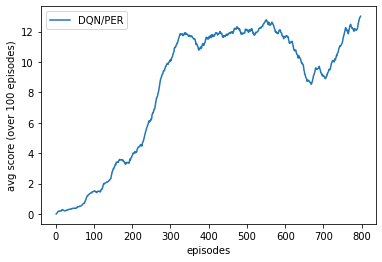

In [6]:
replay_buffer = PriorityReplayBuffer(alpha=0.5)
agent = Agent(env_train.state_size, env_train.action_size, gamma=1, seed=0, lr=0.001, 
              targets_algo=DQN_algo, replay_buffer=replay_buffer)

steps, score = train(env_train, agent, 2000)
plt.plot(steps, score, label="DQN/PER")

plt.legend()
plt.xlabel("episodes")
plt.ylabel("avg score (over 100 episodes)")
plt.show()

 - episodes: 634/2000, average score: 13.03


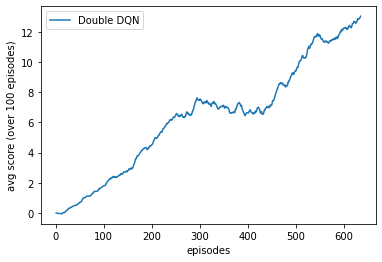

In [7]:
agent = Agent(env_train.state_size, env_train.action_size, gamma=1, seed=0, lr=0.001, 
              targets_algo=DoubleDQN_algo)

steps, score = train(env_train, agent, 2000)
plt.plot(steps, score, label="Double DQN")

plt.legend()
plt.xlabel("episodes")
plt.ylabel("avg score (over 100 episodes)")
plt.show()

 - episodes: 381/2000, average score: 13.07


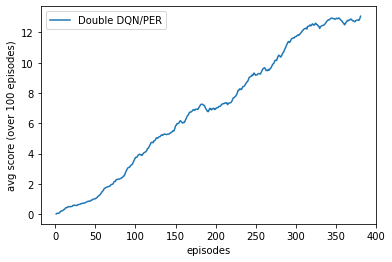

In [10]:
replay_buffer = PriorityReplayBuffer(alpha=0.5)
agent = Agent(env_train.state_size, env_train.action_size, gamma=1, seed=0, lr=0.001, 
              targets_algo=DoubleDQN_algo, replay_buffer=replay_buffer)

steps, score = train(env_train, agent, 2000)
plt.plot(steps, score, label="Double DQN/PER")

plt.legend()
plt.xlabel("episodes")
plt.ylabel("avg score (over 100 episodes)")
plt.show()

## Close the environment

After we are done with training, we need to close the environment.

In [11]:
env_train.close()